In [20]:
import torch
from torch import nn

In [21]:
import pandas as pd 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns 
import matplotlib.pyplot as plt 

In [22]:
data = pd.read_csv('../../datasets/housing.csv').set_index('Id')
data.head()

,LotArea,OverallQual,YearBuilt,TotalBsmtSF,GrLivArea,FullBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,GarageArea,SalePrice
Id,,,,,,,,,,,
1,8450,7,2003,856,1710,2,3,Gd,8,548,208500
2,9600,6,1976,1262,1262,2,3,TA,6,460,181500
3,11250,7,2001,920,1786,2,3,Gd,6,608,223500
4,9550,7,1915,756,1717,1,3,Gd,7,642,140000
5,14260,8,2000,1145,2198,2,4,Gd,9,836,250000


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 1 to 1460
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   LotArea       1460 non-null   int64 
 1   OverallQual   1460 non-null   int64 
 2   YearBuilt     1460 non-null   int64 
 3   TotalBsmtSF   1460 non-null   int64 
 4   GrLivArea     1460 non-null   int64 
 5   FullBath      1460 non-null   int64 
 6   BedroomAbvGr  1460 non-null   int64 
 7   KitchenQual   1460 non-null   object
 8   TotRmsAbvGrd  1460 non-null   int64 
 9   GarageArea    1460 non-null   int64 
 10  SalePrice     1460 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 136.9+ KB


In [24]:
data = pd.get_dummies(data,drop_first=True,dtype=pd.Int16Dtype)
data

C:\Users\DELL\AppData\Local\Temp\ipykernel_11668\227406431.py:1: UserWarning: Instantiating Int16Dtype without any arguments.Pass a Int16Dtype instance to silence this warning.
  data = pd.get_dummies(data,drop_first=True,dtype=pd.Int16Dtype)


,LotArea,OverallQual,YearBuilt,TotalBsmtSF,GrLivArea,FullBath,BedroomAbvGr,TotRmsAbvGrd,GarageArea,SalePrice,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA
Id,,,,,,,,,,,,,
1,8450,7,2003,856,1710,2,3,8,548,208500,0,1,0
2,9600,6,1976,1262,1262,2,3,6,460,181500,0,0,1
3,11250,7,2001,920,1786,2,3,6,608,223500,0,1,0
4,9550,7,1915,756,1717,1,3,7,642,140000,0,1,0
5,14260,8,2000,1145,2198,2,4,9,836,250000,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,7917,6,1999,953,1647,2,3,7,460,175000,0,0,1
1457,13175,6,1978,1542,2073,2,3,7,500,210000,0,0,1
1458,9042,7,1941,1152,2340,2,4,9,252,266500,0,1,0


<Axes: >

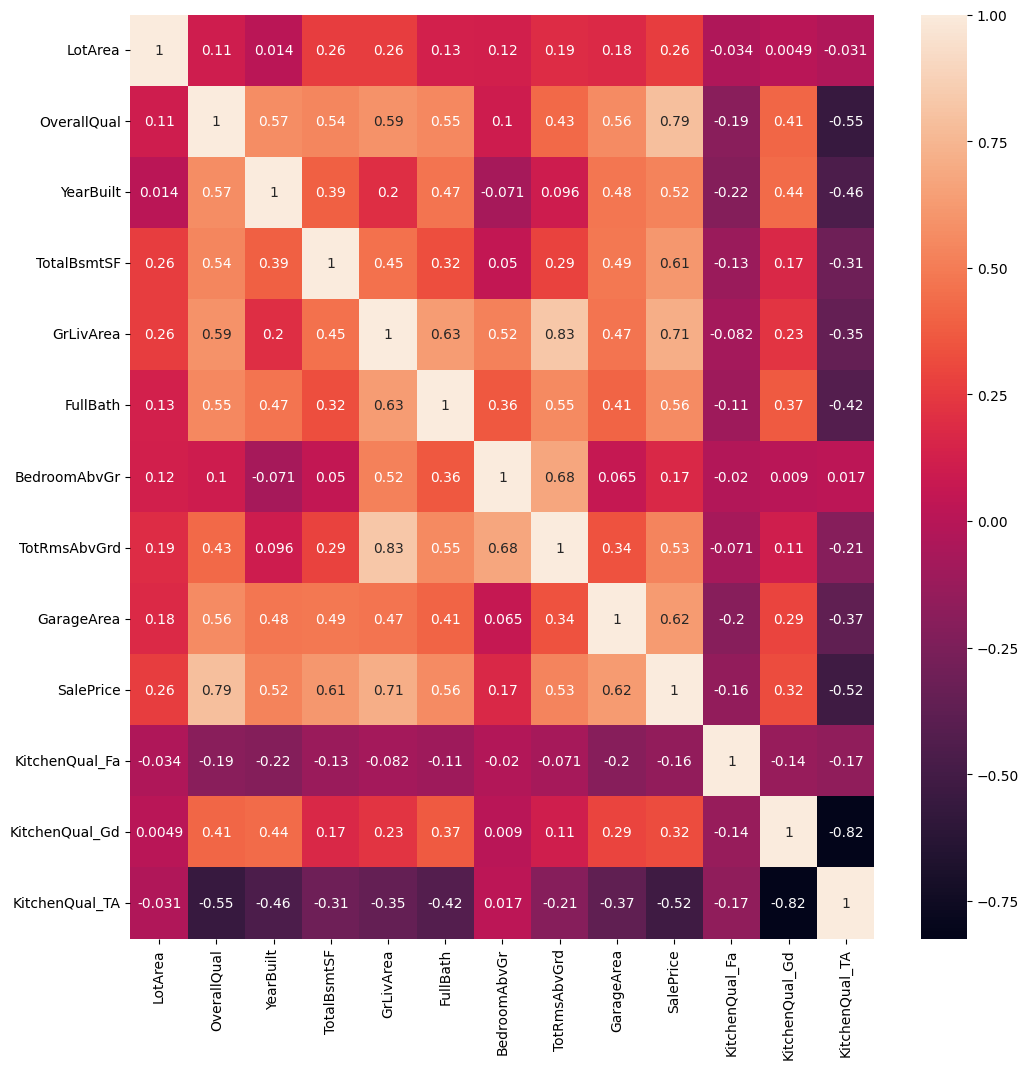

In [25]:
plt.figure(figsize=(12,12))
sns.heatmap(data.corr(),annot=True)

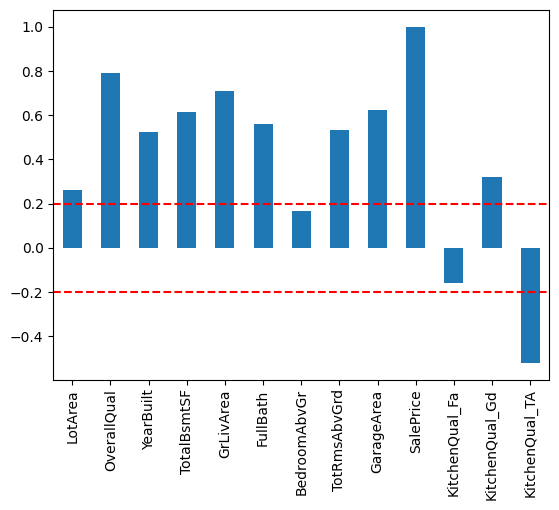

In [26]:
plot = data.corr()['SalePrice'].plot(kind='bar')
plot.axhline(y=0.2,color='red',linestyle='--')
plot.axhline(y=-0.2,color='red',linestyle='--')

In [27]:
data.columns

Index(['LotArea', 'OverallQual', 'YearBuilt', 'TotalBsmtSF', 'GrLivArea',
       'FullBath', 'BedroomAbvGr', 'TotRmsAbvGrd', 'GarageArea', 'SalePrice',
       'KitchenQual_Fa', 'KitchenQual_Gd', 'KitchenQual_TA'],
      dtype='object')

In [28]:
x = data.drop(columns=['SalePrice','KitchenQual_Fa','BedroomAbvGr'])
y = data['SalePrice']

In [29]:
scalarX = StandardScaler()  # to scale data 
scalarY = StandardScaler()  # to scale label 

In [30]:
x = scalarX.fit_transform(x)
y = scalarY.fit_transform(y.values.reshape(-1,1))

In [31]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2,shuffle=True,random_state=23)
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((1168, 10), (1168, 1), (292, 10), (292, 1))

In [32]:
# Convert data to tensors 
x_train = torch.tensor(x_train,dtype=torch.float32)
y_train = torch.tensor(y_train,dtype=torch.float32)
x_test = torch.tensor(x_test,dtype=torch.float32)
y_test = torch.tensor(y_test,dtype=torch.float32)

In [33]:
class CustomDataModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.Linear1 = nn.Linear(in_features=10,out_features=8)
        self.Linear2 = nn.Linear(in_features=8,out_features=5)
        self.Linear3 = nn.Linear(in_features=5,out_features=3)
        self.Linear4 = nn.Linear(in_features=3,out_features=1)

        self.relu = nn.ReLU()

    
    def forward(self,x):
        z = self.Linear1(x)
        z = self.relu(z)
        z = self.Linear2(z)
        z = self.relu(z)
        z = self.Linear3(z)
        z = self.relu(z)
        z = self.Linear4(z)
        return z 

In [34]:
model = CustomDataModel()
# model.state_dict()

In [35]:
loss_fn = nn.MSELoss()
optimizer = torch.optim.Adam(params=model.parameters(),lr=0.01)

In [36]:
epochs = 1000

train_loss_list = []
test_loss_list = []
epoch_count = []

for epoch in range(epochs):

    model.train()

    y_pred = model(x_train)

    loss = loss_fn(y_train,y_pred)

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()


    model.eval()

    with torch.inference_mode():

        y_test_pred  = model(x_test)

        test_loss = loss_fn(y_test,y_test_pred)


    if epoch % 100 == 0:

        epoch_count.append(epoch)

        train_loss_list.append(loss)

        test_loss_list.append(test_loss)

        print(f"Epoch : {epoch} | Training Loss : {loss} | Testing Loss : {test_loss}")

Epoch : 0 | Training Loss : 1.1815452575683594 | Testing Loss : 0.9702708721160889
Epoch : 100 | Training Loss : 0.16636145114898682 | Testing Loss : 0.12545040249824524
Epoch : 200 | Training Loss : 0.10478359460830688 | Testing Loss : 0.10399997979402542
Epoch : 300 | Training Loss : 0.09731005132198334 | Testing Loss : 0.10736458748579025
Epoch : 400 | Training Loss : 0.09231676161289215 | Testing Loss : 0.10805638134479523
Epoch : 500 | Training Loss : 0.08838141709566116 | Testing Loss : 0.10750416666269302
Epoch : 600 | Training Loss : 0.0863373801112175 | Testing Loss : 0.11015468835830688
Epoch : 700 | Training Loss : 0.0846567451953888 | Testing Loss : 0.11461615562438965
Epoch : 800 | Training Loss : 0.0824185237288475 | Testing Loss : 0.12021832913160324
Epoch : 900 | Training Loss : 0.08120796084403992 | Testing Loss : 0.11785588413476944


In [37]:
temp_pred = scalarY.inverse_transform(model(x_test).detach().numpy()) # retransform data to actual values 
temp_real = scalarY.inverse_transform(y_test)
y_pred = temp_pred.reshape(1,-1).squeeze() # reshape data to proper format 
y_true = temp_real.reshape(1,-1).squeeze();

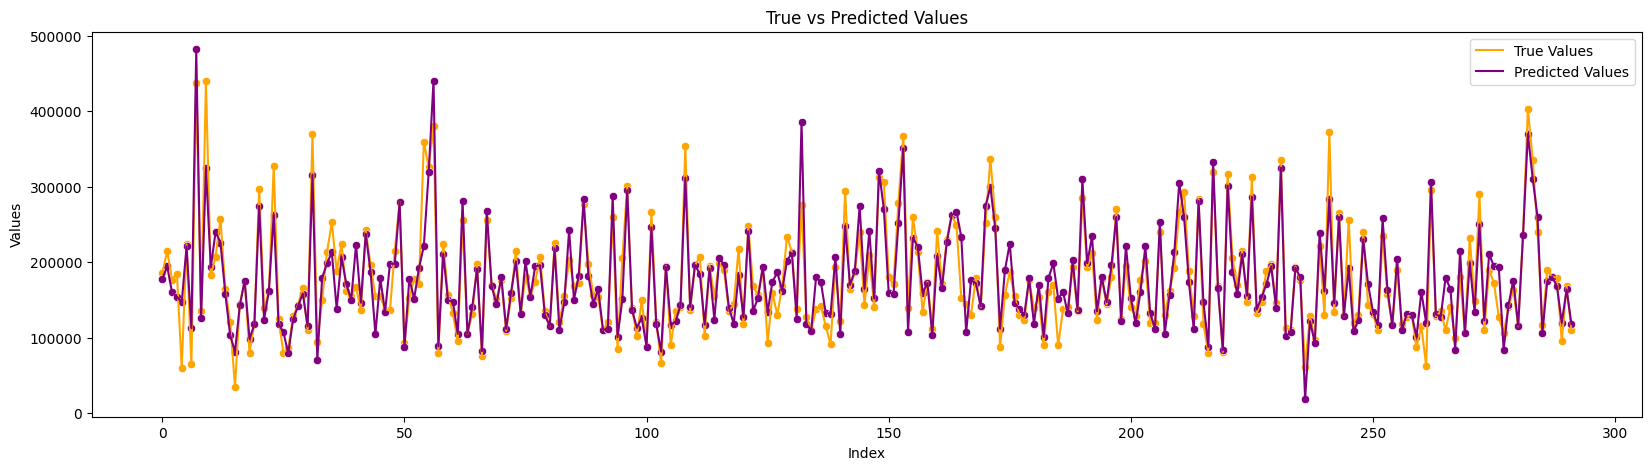

In [40]:
plt.figure(figsize=(20,5))

# Plotting the true values (y_true) in orange
sns.lineplot(y_true, color='orange', label='True Values')
sns.scatterplot(y_true, color='orange')

# Plotting the predicted values (y_pred) in purple
sns.lineplot(y_pred, color='purple', label='Predicted Values')
sns.scatterplot(y_pred, color='purple')

# Adding a legend
plt.legend()

# Optionally, you can add titles and labels if needed
plt.title("True vs Predicted Values")
plt.xlabel("Index")
plt.ylabel("Values")

plt.show()

